In [19]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [20]:
length = 100
percent = 0.2

half_len = int(length/2)
dim = 2

mean1 = [7,7]     # class-1 
mean2 = [13,13]   # class-2 
cov = [[4, 0], [0, 4]]


x1 = np.random.multivariate_normal(mean1, cov, half_len)
x2 = np.random.multivariate_normal(mean2, cov, half_len)
y1 = np.ones(half_len)
y2 = np.zeros(half_len)

x = np.append(x1,x2, axis=0)
y = np.append(y1,y2, axis=0)


# Shuffle the data
perm = np.random.permutation(length)
x = x[perm]
y = y[perm]

# Divide into train and test 
x_train = x[0   :   int(length*(1-percent))]
y_train = y[0   :   int(length*(1-percent))]
x_test = x[int(length*percent)   :   ]
y_test = y[int(length*percent)   :   ]

len_train = x_train.shape[0]
len_test = x_test.shape[0]

x_train = x_train.T
x_test = x_test.T

y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

print(x_train.shape)
print(y_train.shape)

(2, 80)
(1, 80)


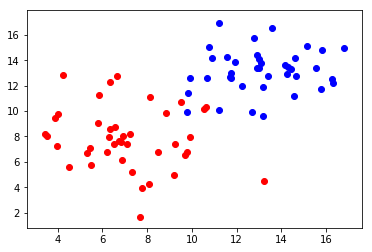

In [21]:
for i in range(len_train):
    if(y_train[0,i] == 1):
        plt.scatter(x_train[0,i], x_train[1,i], color='red')
    elif(y_train[0,i] == 0):
        plt.scatter(x_train[0,i], x_train[1,i], color='blue')

In [22]:
class LogisticRegression : 
    def __init__(self, x ,y, lr=0.001, reg=0.001):
        self.x = x
        self.y = y
        self.lr = lr
        self.reg = reg
        self.dim = self.x.shape[0]
        self.length = self.x.shape[1]
        self.w = np.random.random((dim, 1))
        self.b = 5
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, x):
        return self.sigmoid( np.dot(self.w.T, x) + self.b )
    
    def weight_derivative(self):
        ycap = self.forward(self.x)
        return -(1/self.length) * np.dot( self.x, (self.y-ycap).T ) + self.reg * self.w
    
    def bias_derivative(self): 
        ycap = self.forward(self.x)
        return (1/self.length)*np.sum( ycap - self.y )
    
    def update(self):
        del_W = self.weight_derivative()
        del_b = self.bias_derivative()
        self.w = self.w - self.lr * del_W
        self.b = self.b - self.lr * del_b
    
    def cost(self, y, yhat, test=False):
        # Cross Entropy Loss
        J = (1/self.length) * (-self.y*np.log(yhat) - (1-self.y)*np.log(1-yhat)) 
        if(not test):
            J = J + self.reg * np.sum(self.w * self.w) # Since regularization term is only added during training
        return np.sum(J)

train:  5.543937469330819 test:  4.7372177925281855
train:  5.461236739418432 test:  4.6760370282737345
train:  5.378551507733594 test:  4.614858257117209
train:  5.295882025328221 test:  4.553681692619497
train:  5.213228573643313 test:  4.492507574525322
train:  5.130591468601012 test:  4.431336172334242
train:  5.047971065286738 test:  4.370167789411024
train:  4.96536776334084 test:  4.309002767720239
train:  4.882782013150448 test:  4.24784149328178
train:  4.800214322996332 test:  4.186684402485243
train:  4.717665267291304 test:  4.125531989380191
train:  4.635135496095389 test:  4.064384814126841
train:  4.552625746122843 test:  4.0032435127923405
train:  4.470136853481344 test:  3.9421088087246257
train:  4.387669768441932 test:  3.880981525773071
train:  4.305225572572267 test:  3.819862603672458
train:  4.222805498638666 test:  3.7587531159646477
train:  4.140410953743698 test:  3.6976542908984777
train:  4.058043546250497 test:  3.636567535824918
train:  3.975705117141517 t

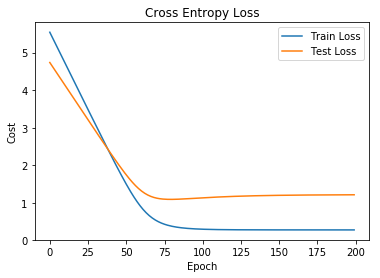

In [23]:
learning_rate = 1e-3
regularization = 1e-3
lr = LogisticRegression(x = x_train, y = y_train, lr = learning_rate, reg = regularization)

x1 = np.linspace(0,20)

cost_train = []
cost_test = []

for i in range(200):
    
    yhat_train = lr.forward(x_train)
    c_train = lr.cost(y_train, yhat_train)
    
    yhat_test = lr.forward(x_test)
    c_test = lr.cost(y_train, yhat_test, test=True)
    
    print('train: ', c_train, 'test: ', c_test)
    
    cost_train.append(c_train)
    cost_test.append(c_test)
    
    lr.update()

plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Cost')
tr, = plt.plot(cost_train, label='Train Loss')
te, = plt.plot(cost_test, label='Test Loss')
plt.legend(handles=[tr, te])

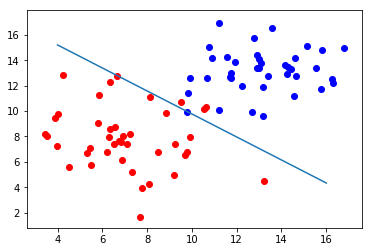

In [24]:
x1 = np.linspace(4,16)
x2 = (-1/lr.w[1,0]) * (lr.b + lr.w[0,0]*x1)

for i in range(len_train):
    if(y_train[0,i] == 1):
        plt.scatter(x_train[0,i], x_train[1,i], color='red')
    elif(y_train[0,i] == 0):
        plt.scatter(x_train[0,i], x_train[1,i], color='blue')
plt.plot(x1,x2)